In [1]:
import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [10]:
result.shape

(3244032, 17)

In [11]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244032 entries, 0 to 3244031
Data columns (total 17 columns):
exp       object
i         int64
j         int64
k         int64
run       int64
2m1       float64
3m2       float64
4m3       float64
5m4       float64
6m5       float64
7m6       float64
8m7       float64
9m8       float64
10m9      float64
11m10     float64
12m11     float64
theory    float64
dtypes: float64(12), int64(4), object(1)
memory usage: 420.8+ MB


# Machine Learning

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [28]:
X = result.iloc[:, 5:-1].values
y = result['theory'].values

X.shape

(3244032, 11)

In [29]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

## Linear Regression

In [16]:
lr = LinearRegression()

lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [17]:
print('Slope: %.3f' % lr.coef_[0])
print('Intercept: %.3f' % lr.intercept_)

Slope: 0.002
Intercept: 2.207


In [18]:
lr.coef_

array([ 2.33863162e-03, -4.19885504e-03,  7.22207656e-04,  2.00341037e-03,
        1.70398970e-03, -1.58987696e-04, -1.66129664e-05,  3.89560967e-04,
       -8.92987495e-05,  2.56435431e-04,  4.05203871e-04])

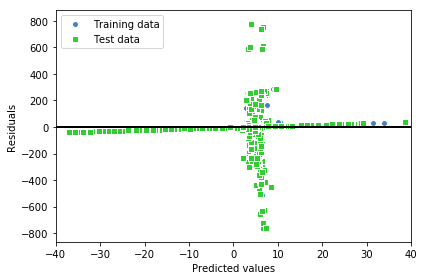

In [19]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-40, xmax=40, color='black', lw=2)
plt.xlim([-40, 40])
plt.tight_layout()

plt.show()

In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 68.223, test: 75.965
R^2 train: 0.023, test: 0.020


In [21]:
print('Train Accuracy: %.3f' % lr.score(X_train, y_train))
print('Test Accuracy: %.3f' % lr.score(X_test, y_test))

Train Accuracy: 0.023
Test Accuracy: 0.020
